# Phase diagram of a pure substance

In [1]:
from feos.si import *
from feos.eos import EquationOfState, PhaseDiagram
from feos.pcsaft import PcSaftParameters
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_context('talk')
sns.set_palette('Dark2')
sns.set_style('ticks')
colors = sns.palettes.color_palette('Dark2', 1)

In [2]:
parameters = PcSaftParameters.from_json(
    substances=['methanol'], 
    pure_path='../parameters/pcsaft/gross2002.json'
)
eos = EquationOfState.pcsaft(parameters)
phase_diagram = PhaseDiagram.pure(eos, 150.0 * KELVIN, 201)

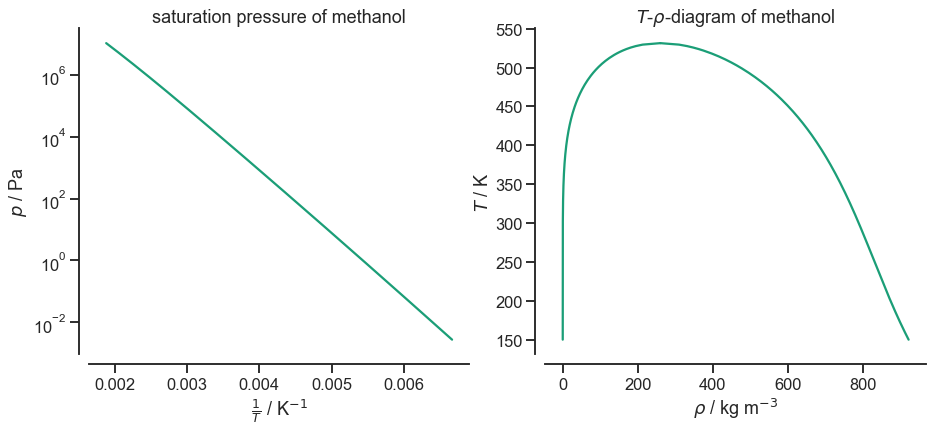

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].set_title(
    "saturation pressure of {}".format(
        parameters.pure_records[0].identifier.name
    )
)
sns.lineplot(
    y=phase_diagram.vapor.pressure / PASCAL, 
    x=1.0/phase_diagram.vapor.temperature * KELVIN, 
    ax=ax[0]
)
ax[0].set_yscale('log')
ax[0].set_xlabel(r'$\frac{1}{T}$ / K$^{-1}$');
ax[0].set_ylabel(r'$p$ / Pa');
#ax[0].set_xlim()
#ax[0].set_ylim()

ax[1].set_title(
    r"$T$-$\rho$-diagram of {}".format(
        parameters.pure_records[0].identifier.name
    )
)
sns.lineplot(
    y=phase_diagram.vapor.temperature / KELVIN, 
    x=phase_diagram.vapor.mass_density / KILOGRAM * METER**3, 
    ax=ax[1], 
    color=colors[0]
)
sns.lineplot(
    y=phase_diagram.liquid.temperature / KELVIN, 
    x=phase_diagram.liquid.mass_density / KILOGRAM * METER**3, 
    ax=ax[1], 
    color=colors[0]
)
ax[1].set_ylabel(r'$T$ / K');
ax[1].set_xlabel(r'$\rho$ / kg m$^{-3}$');
#ax[1].set_ylim()
#ax[1].set_xlim()

sns.despine(offset=10)